#          **Car Price Prediction** 


### Introduction:
*  The price of a car is influenced by a multitude of factors, such as the reputation of the car brand, the car's features, its horsepower, mileage,and numerous other attributes. Car price prediction holds a significant place in the realm of machine learning research. This project is designed to guide you through the process of training a car price prediction model, making it an excellent starting point if you're interested in delving into this captivating field.



### Objective:
*  This project aims to develop a car price prediction model using machine learning techniques. We will explore a dataset containing relevant information about cars, including their features and prices. By leveraging this data, we will learn how to preprocess the information, train a predictive model, and assess its performance.

## **Import Libraries and Load Dataset**

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Load the dataset
df = pd.read_csv("CarPrice_Assignment.csv")


## **Explore Dataset**

In [42]:
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [43]:
df.shape

(205, 26)

In [44]:
df.info

<bound method DataFrame.info of      car_ID  symboling                   CarName fueltype aspiration  \
0         1          3        alfa-romero giulia      gas        std   
1         2          3       alfa-romero stelvio      gas        std   
2         3          1  alfa-romero Quadrifoglio      gas        std   
3         4          2               audi 100 ls      gas        std   
4         5          2                audi 100ls      gas        std   
..      ...        ...                       ...      ...        ...   
200     201         -1           volvo 145e (sw)      gas        std   
201     202         -1               volvo 144ea      gas      turbo   
202     203         -1               volvo 244dl      gas        std   
203     204         -1                 volvo 246   diesel      turbo   
204     205         -1               volvo 264gl      gas      turbo   

    doornumber      carbody drivewheel enginelocation  wheelbase  ...  \
0          two  convertible   

In [45]:
df.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [46]:
df.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

In [47]:
df.describe

<bound method NDFrame.describe of      car_ID  symboling                   CarName fueltype aspiration  \
0         1          3        alfa-romero giulia      gas        std   
1         2          3       alfa-romero stelvio      gas        std   
2         3          1  alfa-romero Quadrifoglio      gas        std   
3         4          2               audi 100 ls      gas        std   
4         5          2                audi 100ls      gas        std   
..      ...        ...                       ...      ...        ...   
200     201         -1           volvo 145e (sw)      gas        std   
201     202         -1               volvo 144ea      gas      turbo   
202     203         -1               volvo 244dl      gas        std   
203     204         -1                 volvo 246   diesel      turbo   
204     205         -1               volvo 264gl      gas      turbo   

    doornumber      carbody drivewheel enginelocation  wheelbase  ...  \
0          two  convertible 

## **Data Visualization - Fuel Type Distribution**

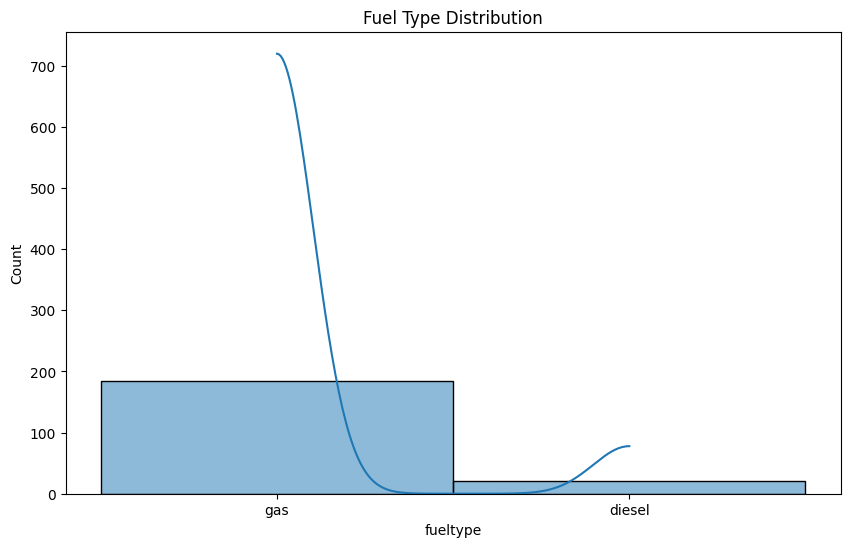

In [48]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x="fueltype", bins=20, kde=True)
plt.title("Fuel Type Distribution")
plt.show()

## **Data Visualization - Engine Size vs Horsepower**

<function matplotlib.pyplot.show(close=None, block=None)>

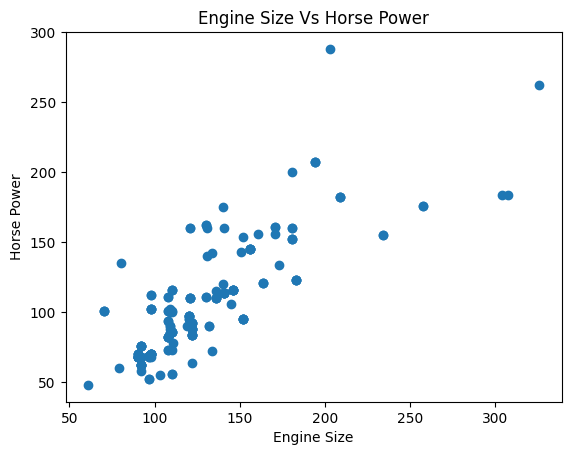

In [49]:
plt.scatter(df["enginesize"],df["horsepower"])
plt.xlabel('Engine Size')
plt.ylabel('Horse Power')
plt.title('Engine Size Vs Horse Power')
plt.show

## **Data Visualization - Distribution of Price**

<function matplotlib.pyplot.show(close=None, block=None)>

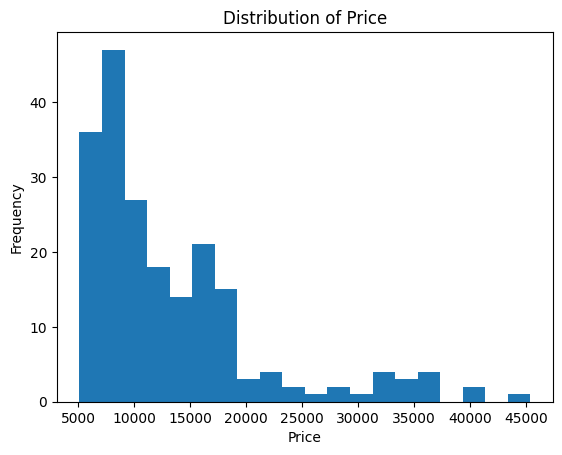

In [50]:
plt.hist(df['price'],bins=20)
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Distribution of Price')
plt.show

## **Data Visualization - Pair Plot**

c:\Users\sutan\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


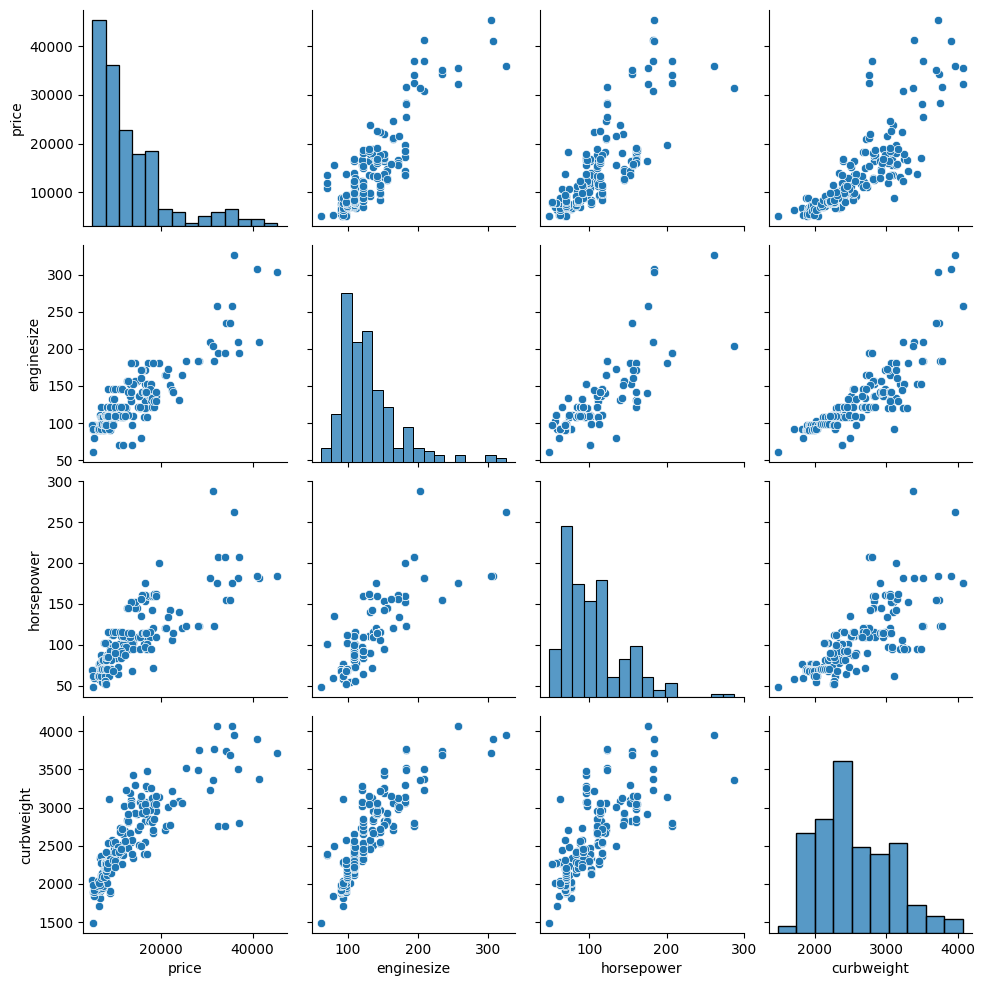

In [51]:
sns.pairplot(df[['price','enginesize','horsepower','curbweight']])

## **Data Preprocessing**

In [52]:
l=LabelEncoder()
var_mod=df.select_dtypes(include='object').columns

for i in var_mod:
    df[i]=l.fit_transform(df[i])

## **Split Data and Train-Test Split**

In [53]:
X=df.drop(['price'],axis=1)
Y=df['price']

x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2)

In [54]:
model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

## **Model Evaluation**

In [55]:
y_pred=model.predict(x_test)
mse=mean_squared_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)

print("Mean_sqyuared_error: ", mse)
print("r2 value: ",r2)


Mean_sqyuared_error:  7237365.387938246
r2 value:  0.8931760973471841


## **Price Prediction for New Car Features**

In [56]:
new_car_features = [4000, 0, 2, 3, 0, 96.0, 172.0, 65.4, 2221, 120, 4, 3.46, 3.19, 9.0, 68, 5500, 31, 38, 0, 0, 0, 0, 0, 0, 0]
new_car_price = model.predict([new_car_features])
print("Predicted Price:", new_car_price)

Predicted Price: [21093311.0980036]


c:\Users\sutan\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
